In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [5]:
from google.colab import files
fileUpload = files.upload()

Saving Fig0943.tif to Fig0943.tif


In [2]:
def erode(img, s):
  borda = (s.shape[0]-1)//2
  altura,largura = img.shape
  img_saida = np.zeros((altura,largura))
  max_bin = img.max()
  soma_s = np.sum(s)*max_bin

  for x in range(borda, altura-borda):
    for y in range(borda, largura-borda):
      if np.sum(img[x-borda:x+borda+1,y-borda:y+borda+1]*s)==soma_s:
        img_saida[x,y] = max_bin
  return img_saida

In [3]:
square_circle = cv2.imread("Fig943.tif", 0)
inverted_img = 255 - square_circle
ret, thresholded_square_circle = cv2.threshold(inverted_img, 175, 255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_OPEN,(43,43))
new = 255- erode(thresholded_square_circle, kernel)


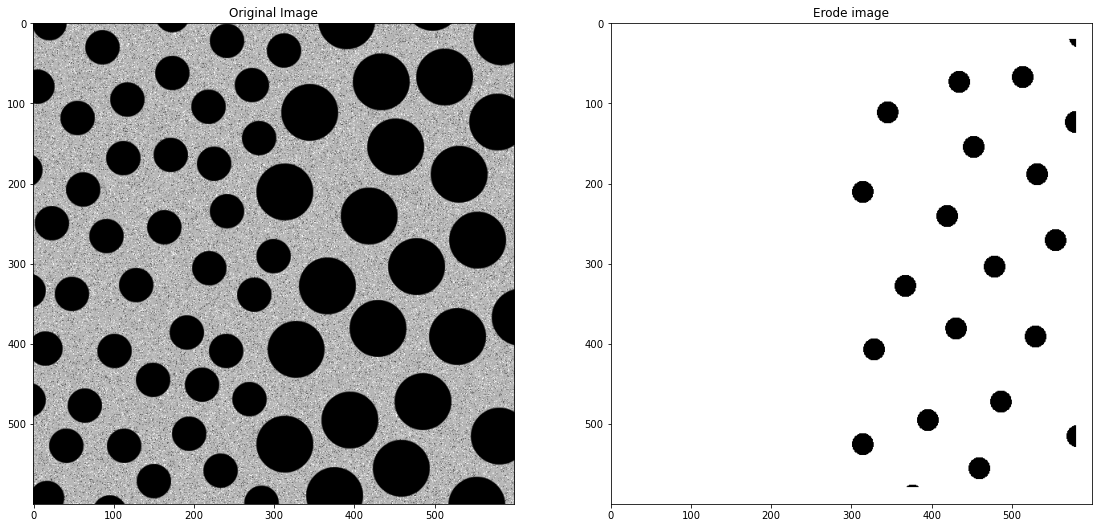

In [4]:
plt.figure(figsize=(50,50), constrained_layout=False)
plt.subplot(151), plt.imshow(square_circle, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(new, "gray"), plt.title("Erode image")
plt.show()